## Predicting Customer Churn: Exploring Key Indicators and Retention Strategies

### Hypothesis
Null hypothesis: There is no significant relationship between the customer's characteristics and their likelihood to churn from the company's product or service.

Alternative hypothesis: There is a significant relationship between the customer's characteristics and their likelihood to churn from the company's product or service.

This hypothesis can be used to explore the relationship between various customer characteristics, such as gender, age, tenure, internet service provider, contract term, and payment method, and the likelihood of churn. By understanding the key indicators of churn, the organization can develop strategies to retain customers and minimize attrition.

### Questions to achieve the objectives of the project:
1.	What is the overall churn rate in the company?
2.	How does the churn rate vary with different demographic factors such as gender, senior citizen status, and partner/dependent status?
3.	Is there a correlation between the tenure of a customer and the likelihood of churn?
4.	Are customers with a specific internet service type more likely to churn than others?
5.	Is there a relationship between monthly charges and churn rate?
6.	Does the payment method have an impact on the likelihood of churn?
7.	Which contract type has the highest churn rate?
8.	What are the key indicators of churn?
9.	What strategies can be implemented to retain customers and reduce churn?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from pycaret.classification import *


import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read a CSV file called 'Telco-Customer-Churn.csv' and store the data in a Pandas DataFrame called churn_df
churn_df = pd.read_csv(r'Telco-Customer-Churn\Telco-Customer-Churn.csv')

# Set the 'customerID' column as the index of the churn_df DataFrame
churn_df.set_index('customerID', inplace= True)

# Return the churn_df DataFrame, with the customerID column as the index
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [3]:
# Print information about the churn_df DataFrame
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [4]:
# Check for missing values in the churn_df DataFrame
churn_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Unvariate Analysis

In [5]:
# Generate descriptive statistics of the churn_df DataFrame
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:

# Select the columns to calculate skewness and kurtosis for
columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

# Loop through the columns and calculate skewness and kurtosis
for col in columns:
    s = skew(churn_df[col])
    k = kurtosis(churn_df[col])
    print(f"{col}: Skewness = {s:.2f}, Kurtosis = {k:.2f}")

SeniorCitizen: Skewness = 1.83, Kurtosis = 1.36
tenure: Skewness = 0.24, Kurtosis = -1.39
MonthlyCharges: Skewness = -0.22, Kurtosis = -1.26


For SeniorCitizen, the skewness is 1.83, which indicates that the distribution is heavily skewed to the right. This means that there are more data points on the left side of the distribution, and a long tail on the right side. The kurtosis is 1.36, which indicates that the distribution is relatively peaked, with a moderate amount of data in the tails. A plot of this distribution would show a long tail on the right side and a relatively high peak.

For tenure, the skewness is 0.24, which indicates a slight right skew, but the distribution is generally fairly symmetrical. The kurtosis is -1.39, which indicates that the distribution is relatively flat, with little data in the tails.

For MonthlyCharges, the skewness is -0.22, which indicates a slight left skew, but the distribution is generally fairly symmetrical. The kurtosis is -1.26, which indicates that the distribution is relatively flat, with little data in the tails. A plot of this distribution would show a relatively flat peak.

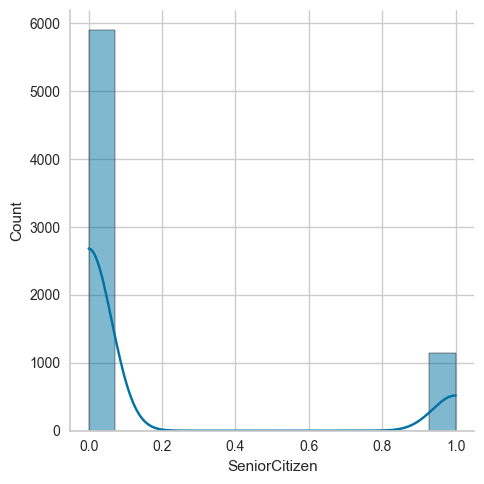

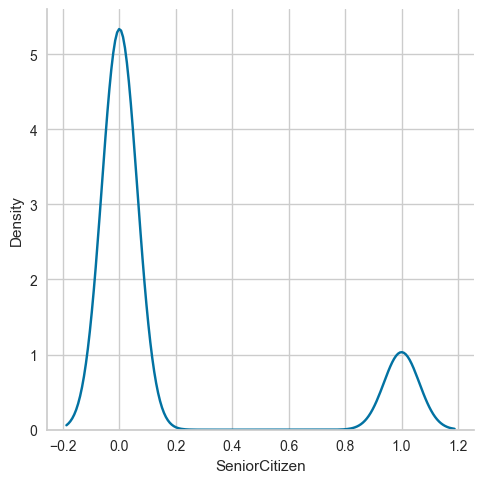

In [7]:
# Plot the histogram and density plot for SeniorCitizen
sns.displot(churn_df, x='SeniorCitizen', kind='hist', kde=True)
sns.displot(churn_df, x='SeniorCitizen', kind='kde')

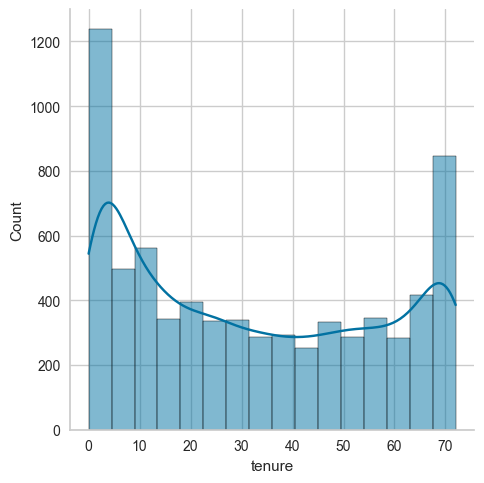

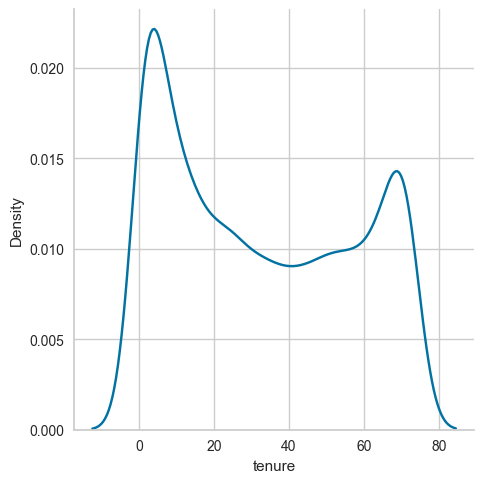

In [8]:
# Plot the histogram and density plot for tenure
sns.displot(churn_df, x='tenure', kind='hist', kde=True)
sns.displot(churn_df, x='tenure', kind='kde')

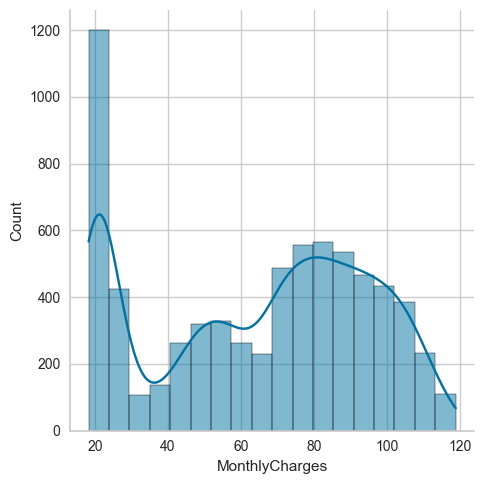

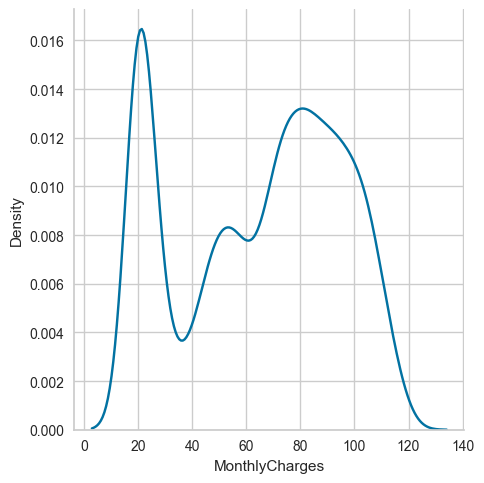

In [9]:
# Plot the histogram and density plot for MonthlyCharges
sns.displot(churn_df, x='MonthlyCharges', kind='hist', kde=True)
sns.displot(churn_df, x='MonthlyCharges', kind='kde')

In [10]:
# # Plot the density plot
# sns.kdeplot(churn_df['MonthlyCharges'])

# # Calculate and print the skewness and kurtosis
# skewness = churn_df['MonthlyCharges'].skew()
# kurtosis = churn_df['MonthlyCharges'].kurtosis()
# print('Skewness:', skewness)
# print('Kurtosis:', kurtosis)

## Multivariate Analysis

In [11]:
# Create contingency table
cont_table = pd.crosstab(index=churn_df['Churn'], columns=churn_df['gender'])

# Print contingency table
print(cont_table)

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930


In [12]:
# Calculate the correlation matrix for the churn_df DataFrame
churn_corr = churn_df.corr()

# Print the churn_corr DataFrame
churn_corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


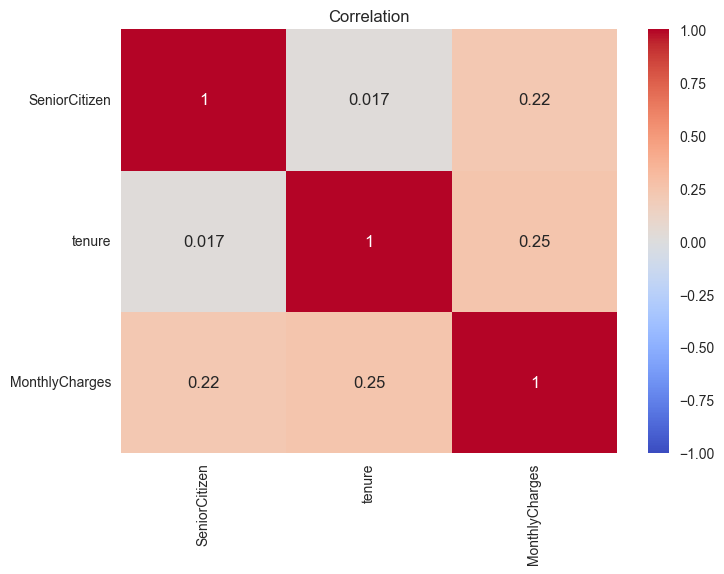

In [13]:
# create a heatmap using seaborn
heatmap = sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


# set rotation for x-axis and y-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# set plot title
plt.title('Correlation')

# show the plot
plt.show()

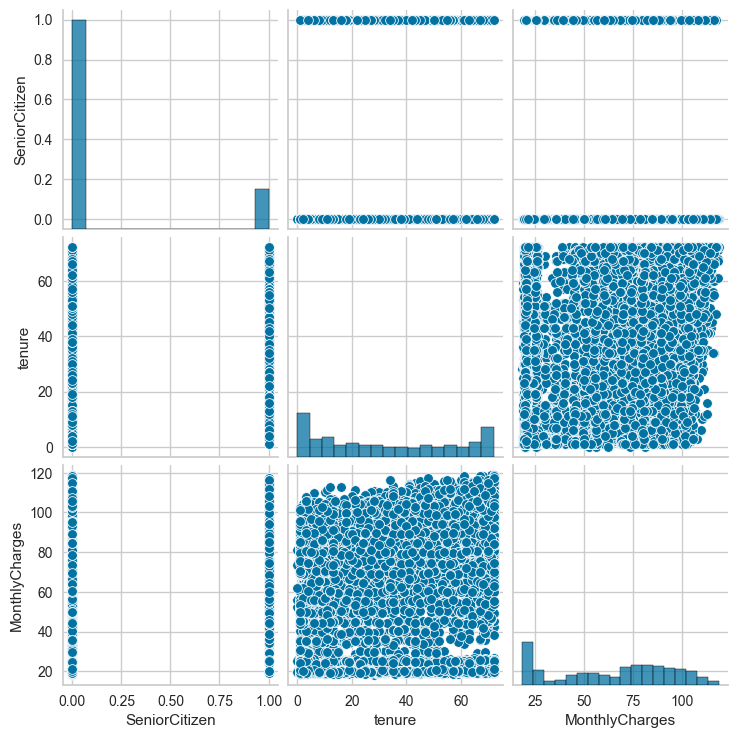

In [14]:
# Create a pair plot of the churn_df DataFrame
sns.pairplot(churn_df)


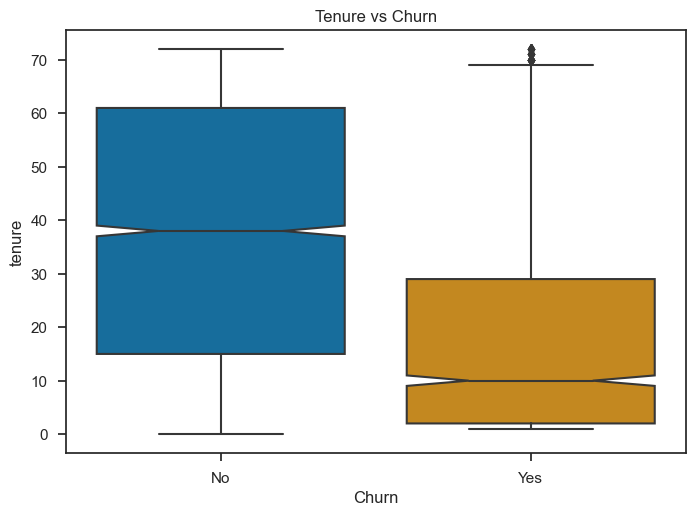

In [15]:
# sns.set(style='ticks', palette='colorblind')

# # create boxplot
# sns.boxplot(x='Churn', y='tenure', data=churn_df, showfliers=True, whis=1.5, notch=True)

# # add title
# plt.title('Tenure vs Churn')

# # show plot
# plt.show()

def plot_boxplot(df, x, y, title):
    sns.set(style='ticks', palette='colorblind')
    sns.boxplot(x=x, y=y, data=df, showfliers=True, whis=1.5, notch=True)
    plt.title(title)
    plt.show()


plot_boxplot(churn_df, 'Churn', 'tenure', 'Tenure vs Churn')

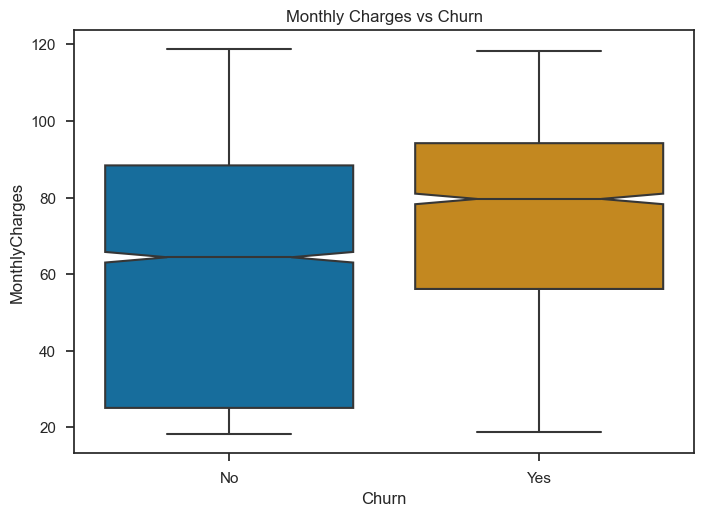

In [16]:
plot_boxplot(churn_df, 'Churn', 'MonthlyCharges', 'Monthly Charges vs Churn')

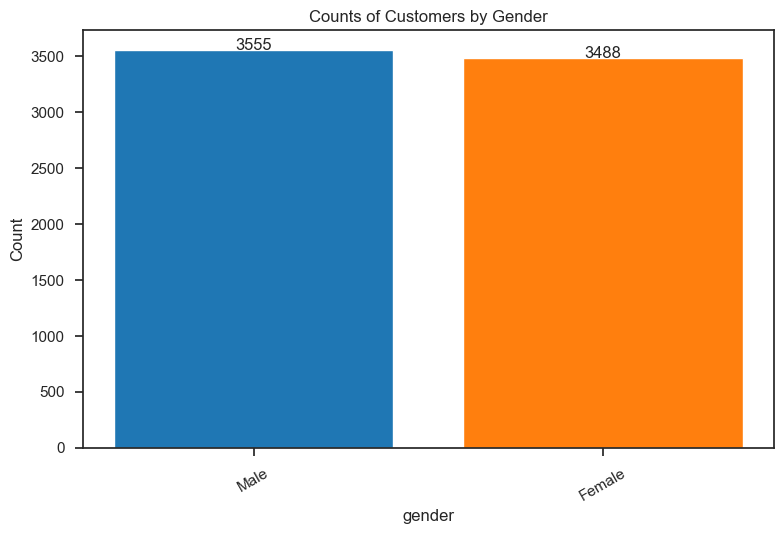

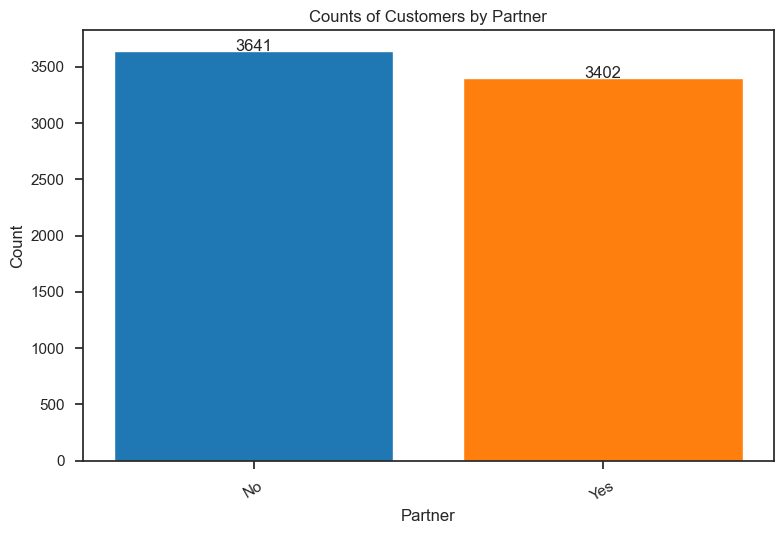

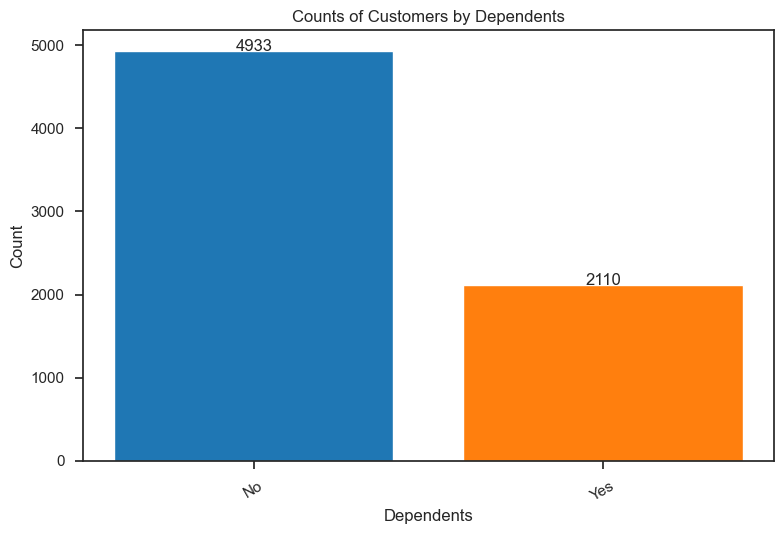

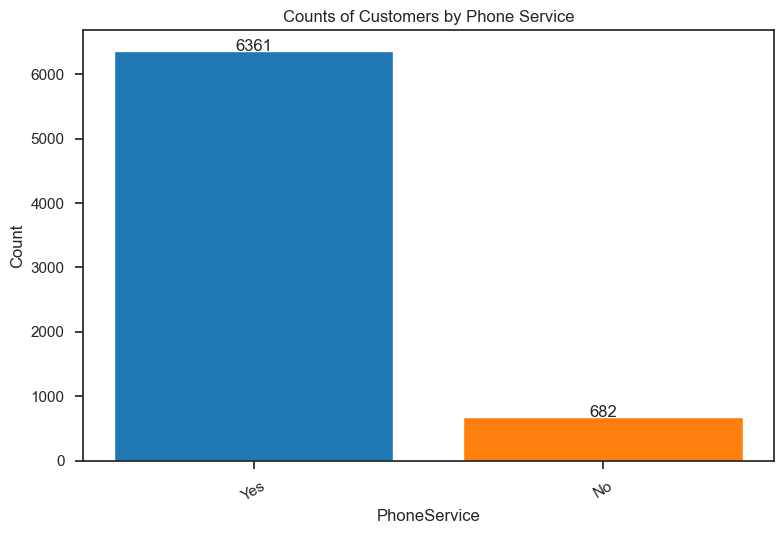

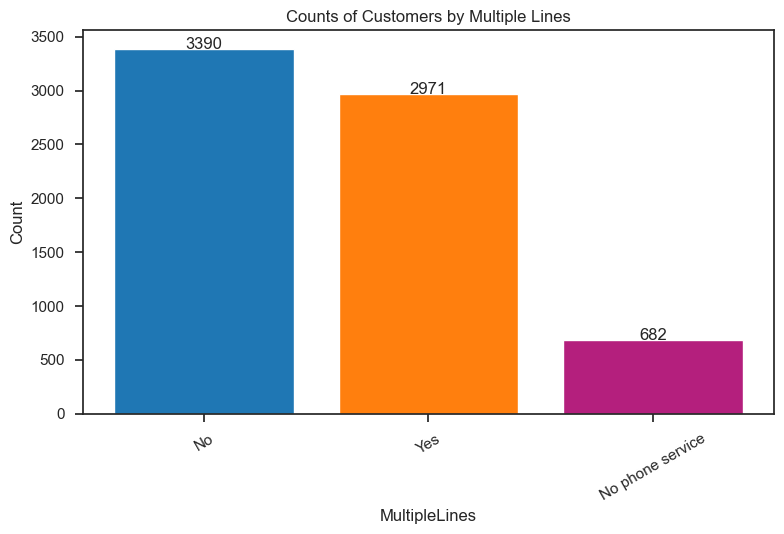

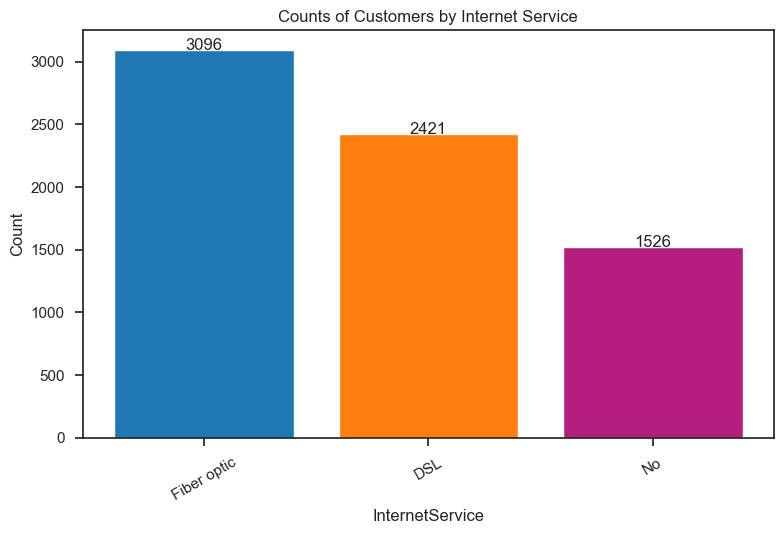

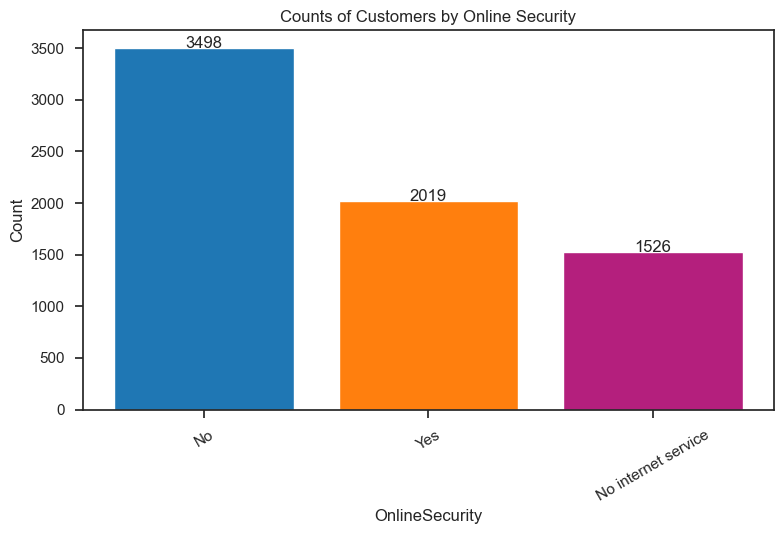

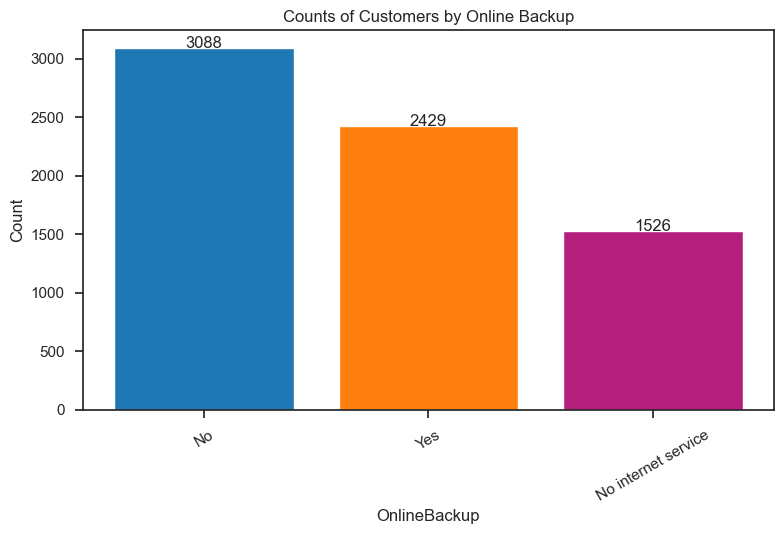

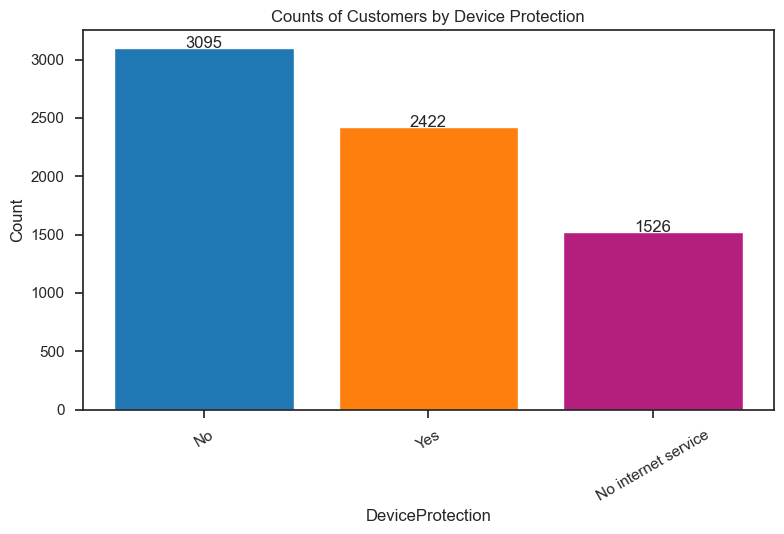

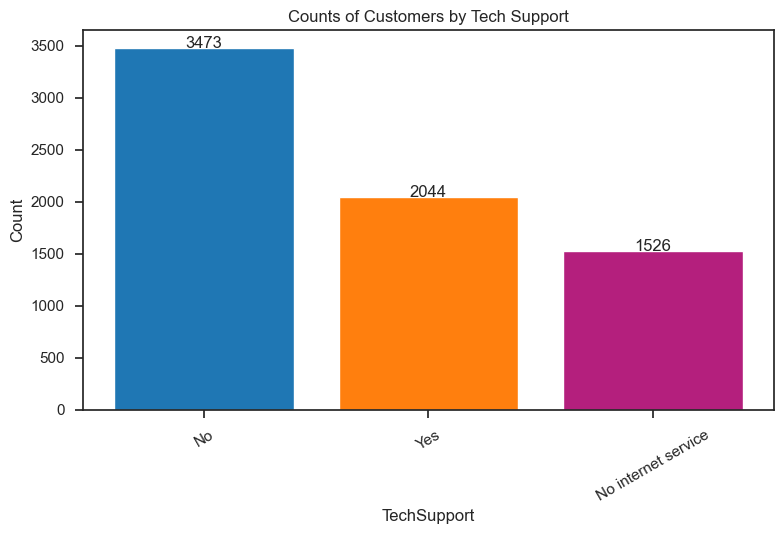

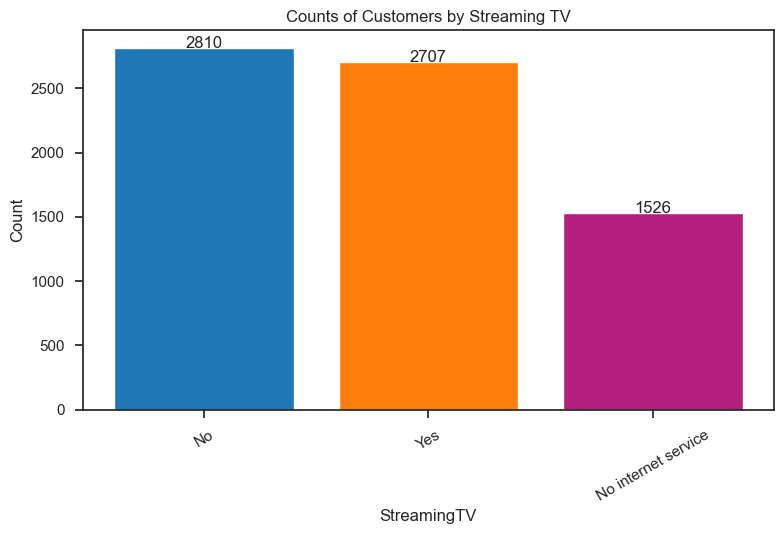

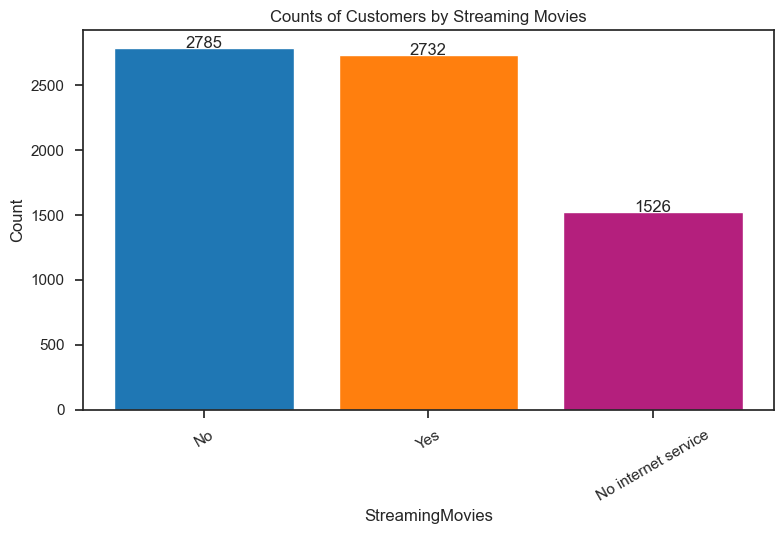

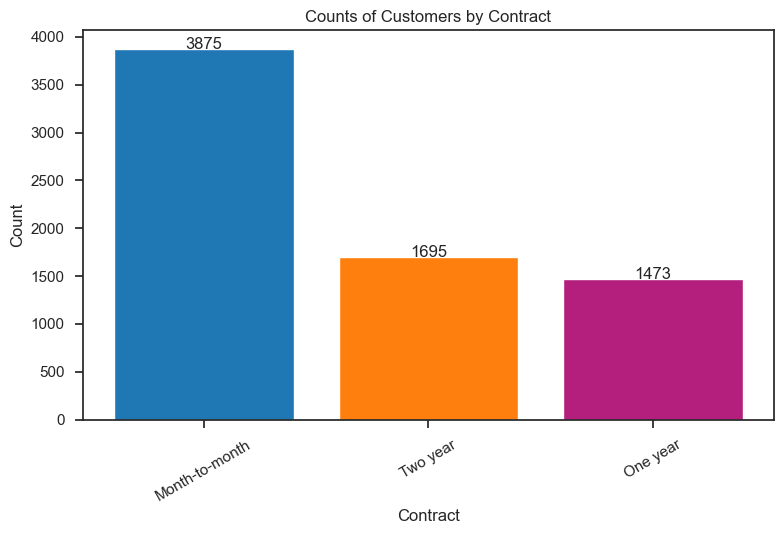

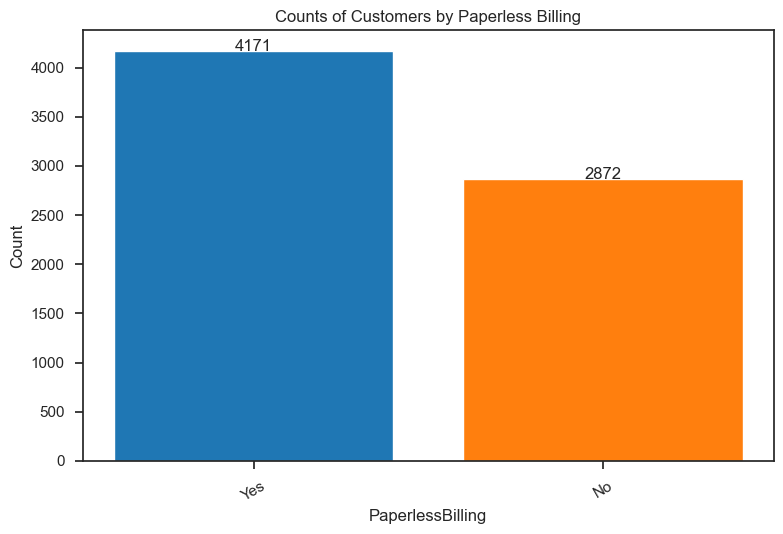

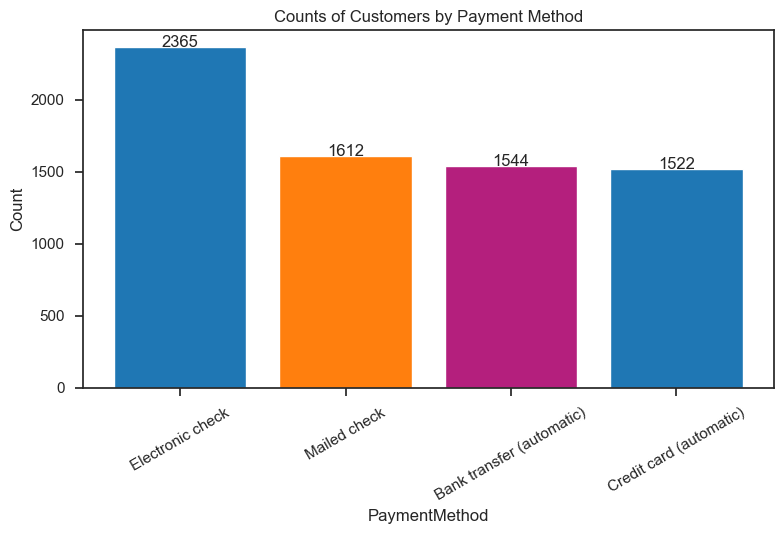

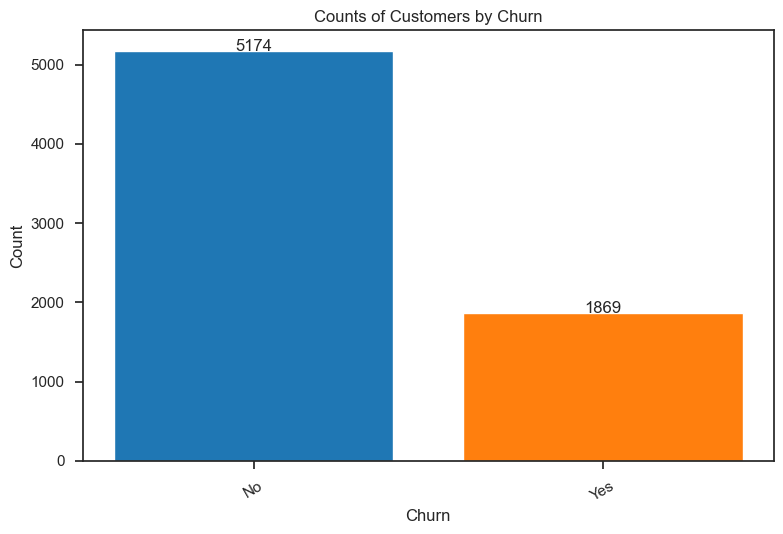

In [17]:
# Define a function called 'plot_counts' that takes a DataFrame, a column name, and an optional title as input
def plot_counts(data, column, title=None):
    # Create a figure and axis object
    fig, ax = plt.subplots()
    # Count the number of occurrences of each unique value in the specified column
    counts = data[column].value_counts()
    # Create a bar chart of the counts for each unique value, using blue and orange colors
    ax.bar(counts.index, counts.values, color=['#1f77b4', '#ff7f0e', '#b41f7d'])
    # Set the x-axis label to the specified column name
    ax.set_xlabel(column)
    # Set the y-axis label to 'Count'
    ax.set_ylabel('Count')
    # If a title is provided, set the title of the plot
    if title:
        ax.set_title(title)
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation= 30)
    # Add labels to each bar in the chart showing the count of customers for each unique value
    for i, v in enumerate(counts.values):
        ax.text(i, v, str(v), ha='center')
    # Adjust the layout of the plot to optimize spacing
    plt.tight_layout()
    # Display the plot
    plt.show()

# Call the 'plot_counts' function on the churn_df DataFrame, specifying the columns
plot_counts(churn_df, "gender", "Counts of Customers by Gender")
plot_counts(churn_df, "Partner", "Counts of Customers by Partner")
plot_counts(churn_df, "Dependents", "Counts of Customers by Dependents")
plot_counts(churn_df, "PhoneService", "Counts of Customers by Phone Service")
plot_counts(churn_df, "MultipleLines", "Counts of Customers by Multiple Lines")
plot_counts(churn_df, "InternetService", "Counts of Customers by Internet Service")
plot_counts(churn_df, "OnlineSecurity", "Counts of Customers by Online Security")
plot_counts(churn_df, "OnlineBackup", "Counts of Customers by Online Backup")
plot_counts(churn_df, "DeviceProtection", "Counts of Customers by Device Protection")
plot_counts(churn_df, "TechSupport", "Counts of Customers by Tech Support")
plot_counts(churn_df, "StreamingTV", "Counts of Customers by Streaming TV")
plot_counts(churn_df, "StreamingMovies", "Counts of Customers by Streaming Movies")
plot_counts(churn_df, "Contract", "Counts of Customers by Contract")
plot_counts(churn_df, "PaperlessBilling", "Counts of Customers by Paperless Billing")
plot_counts(churn_df, "PaymentMethod", "Counts of Customers by Payment Method")
plot_counts(churn_df, "Churn", "Counts of Customers by Churn")

## Checking for class imbalance in Churn

In [18]:
# Count the number of unique values in the 'Churn' column
counts = churn_df['Churn'].value_counts()

# Calculate the percentage of each class in the 'Churn' column
percentages = counts / counts.sum() * 100

# Print the results
print(percentages)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


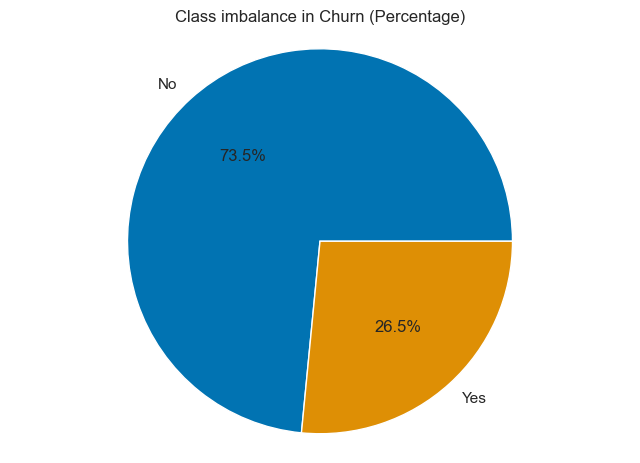

In [19]:
# Define the data for the chart
labels = percentages.index.tolist()
sizes = percentages.values.tolist()

# Create the chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class imbalance in Churn (Percentage)')

# Show the chart
plt.show()


## Answering the Questions

### Q1. What is the overall churn rate in the company?

In [20]:
# Count the number of customers who churned and who did not, and calculate the overall churn rate
churn_count = churn_df['Churn'].value_counts()
total_customers = churn_count[0] + churn_count[1]
churn_rate = (churn_count[1] / total_customers) * 100

# Print the churn rate as a formatted string with 2 decimal places
print('The overall churn rate in the company is: {:.2f}%'.format(churn_rate))


The overall churn rate in the company is: 26.54%


### Q2. How does the churn rate vary with different demographic factors such as gender, senior citizen status, and partner/dependent status?

In [21]:
# Create a new column in the churn_df DataFrame that maps 'No' to 0 and 'Yes' to 1 for the 'Churn' column
churn_df['Churn_numeric'] = churn_df['Churn'].apply(lambda x: 0 if x=='No' else 1)

# Group the DataFrame by gender and calculate the mean of the 'Churn_numeric' column for each gender
churn_by_gender = churn_df.groupby('gender')['Churn_numeric'].mean()

# Display the resulting Series that shows the proportion of customers who churned for each gender
churn_by_gender


gender
Female    0.269209
Male      0.261603
Name: Churn_numeric, dtype: float64

In [22]:
# Group the DataFrame by SeniorCitizen and calculate the mean of the 'Churn_numeric' column for each group
churn_by_senior = churn_df.groupby('SeniorCitizen')['Churn_numeric'].mean()

# Display the resulting Series that shows the proportion of customers who churned for each seniority status
churn_by_senior

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn_numeric, dtype: float64

In [23]:
# Group the DataFrame by Partner and calculate the mean of the 'Churn_numeric' column for each group
churn_by_partner = churn_df.groupby('Partner')['Churn_numeric'].mean()

# Display the resulting Series that shows the proportion of customers who churned for each partner status
churn_by_partner


Partner
No     0.329580
Yes    0.196649
Name: Churn_numeric, dtype: float64

In [24]:
# Group the DataFrame by Dependents and calculate the mean of the 'Churn_numeric' column for each group
churn_by_dependents = churn_df.groupby('Dependents')['Churn_numeric'].mean()

# Display the resulting Series that shows the proportion of customers who churned for each dependent status
churn_by_dependents

Dependents
No     0.312791
Yes    0.154502
Name: Churn_numeric, dtype: float64

### Q3. Is there a correlation between the tenure of a customer and the likelihood of churn?

In [25]:
# Calculate correlation coefficient between 'tenure' and 'Churn' columns
corr = churn_df['tenure'].corr(churn_df['Churn_numeric'], method='pearson')
print('Correlation coefficient between tenure and churn:', corr)


Correlation coefficient between tenure and churn: -0.3522286701130777


### Q4. Are customers with a specific internet service type more likely to churn than others?

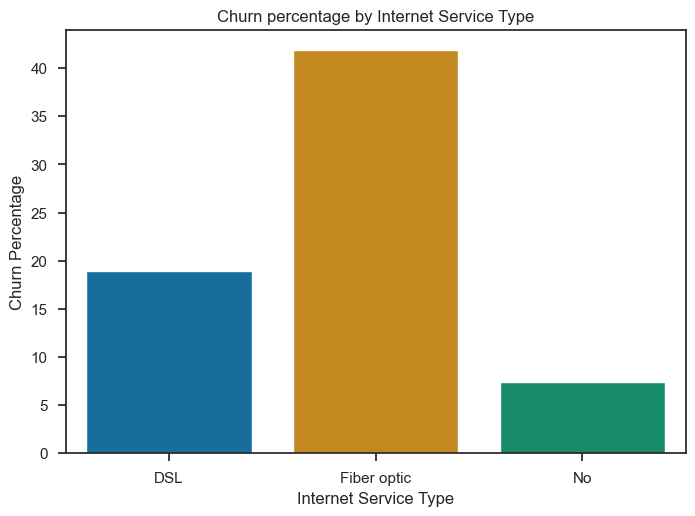

In [26]:
# Create a new dataframe of churned customers only
churned_df = churn_df[churn_df['Churn'] == 'Yes']

# Group the churned customers by internet service type and count the number of customers in each group
churned_by_internet = churned_df.groupby('InternetService').size().reset_index(name='count')

# Group all customers by internet service type and count the number of customers in each group
all_by_internet = churn_df.groupby('InternetService').size().reset_index(name='count')

# Merge the two dataframes on the internet service type column
merged = pd.merge(churned_by_internet, all_by_internet, on='InternetService')

# Calculate the percentage of churned customers in each group
merged['churn_pct'] = merged['count_x'] / merged['count_y'] * 100

# Create a bar chart of the churn percentages by internet service type
sns.barplot(x='InternetService', y='churn_pct', data=merged)
plt.title('Churn percentage by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Percentage')
plt.show()


### Q5. Is there a relationship between monthly charges and churn rate?

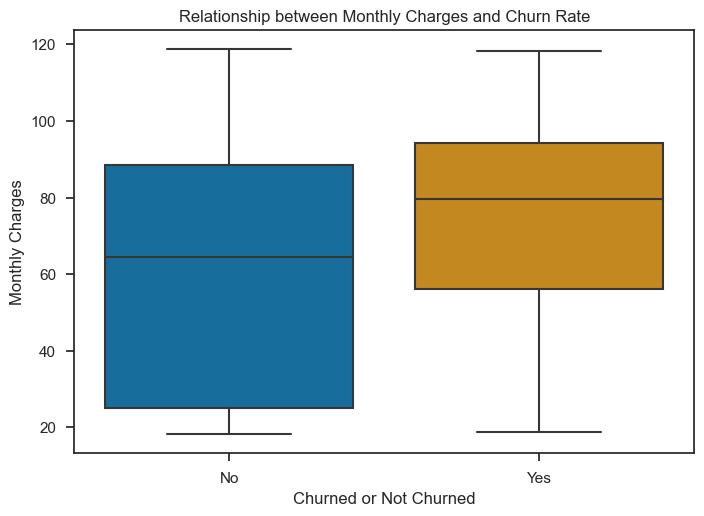

In [27]:
# create a boxplot to visualize the relationship between monthly charges and churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_df)
plt.title('Relationship between Monthly Charges and Churn Rate')
plt.xlabel('Churned or Not Churned')
plt.ylabel('Monthly Charges')
plt.show()

### Q6. Does the payment method have an impact on the likelihood of churn?

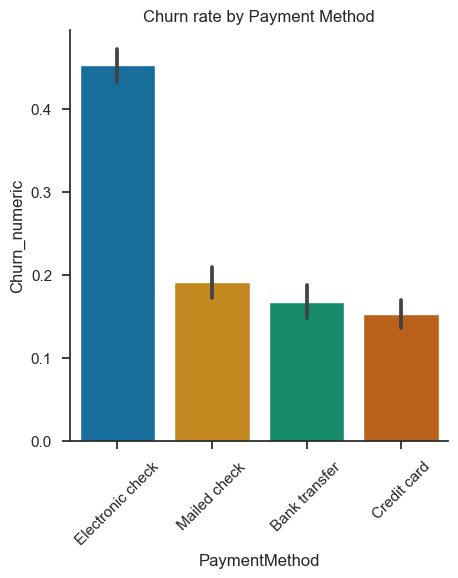

In [28]:
# Define the plot using catplot
g = sns.catplot(x='PaymentMethod', y='Churn_numeric', data=churn_df, kind='bar')

# Set the x-axis labels
g.set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], rotation=45)

# Set the plot title
plt.title('Churn rate by Payment Method')

# Show the plot
plt.show()

### Q7. Which contract type has the highest churn rate?

In [29]:
# Create a pivot table that groups the DataFrame by Contract and calculates the mean of the 'Churn' column for each group
# The aggfunc argument is used to map 'Yes' to 1 and 'No' to 0, and then take the mean of these values
contract_churn = pd.pivot_table(data=churn_df, index='Contract', values='Churn', aggfunc=lambda x: x.map({'Yes':1, 'No':0}).mean())

# Sort the pivot table by the 'Churn' column in descending order
contract_churn.sort_values('Churn', ascending=False)

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


### Q8. What are the key indicators of churn?

In [30]:
# churn_num_droped = churn_df.drop('Churn_numeric', axis=1)

# # Prepare data for training
# X = churn_num_droped.drop('Churn', axis=1)
# y = churn_num_droped['Churn']
# X = pd.get_dummies(X)  # encode categorical variables
# X = X.dropna()  # remove missing values

# # Train a Random Forest Classifier
# rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# rfc.fit(X, y)

# # Get feature importance
# feature_importances = pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['importance'])
# feature_importances = feature_importances.sort_values('importance', ascending=False)

# # Print top 10 features
# print(feature_importances.head(10))


In [31]:
# Drop the target column and encode categorical variables
churn_num_droped = churn_df.drop(['Churn_numeric', 'Churn'], axis=1)
#churn_num_droped = churn_df.drop('Churn', axis=1)

# One-hot encode categorical variables
ohe = OneHotEncoder()
ohe.fit(churn_num_droped.select_dtypes(include=['object']))
categorical_columns = churn_num_droped.select_dtypes(include=['object']).columns
X_ohe = pd.DataFrame(ohe.transform(churn_num_droped.select_dtypes(include=['object'])).toarray(),
                     columns=ohe.get_feature_names_out(categorical_columns))
X_ohe.index = churn_num_droped.index

# Combine one-hot encoded features with numerical features
X = pd.concat([churn_num_droped.select_dtypes(include=['float64', 'int64']), X_ohe], axis=1)
y = churn_df['Churn_numeric']

# Train a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print top 10 features
print(feature_importances.head(10))


                                importance
tenure                            0.099725
MonthlyCharges                    0.083022
Contract_Month-to-month           0.037984
PaymentMethod_Electronic check    0.023617
TechSupport_No                    0.021348
OnlineSecurity_No                 0.021020
InternetService_Fiber optic       0.017858
OnlineBackup_No                   0.015373
SeniorCitizen                     0.014993
OnlineSecurity_Yes                0.014962


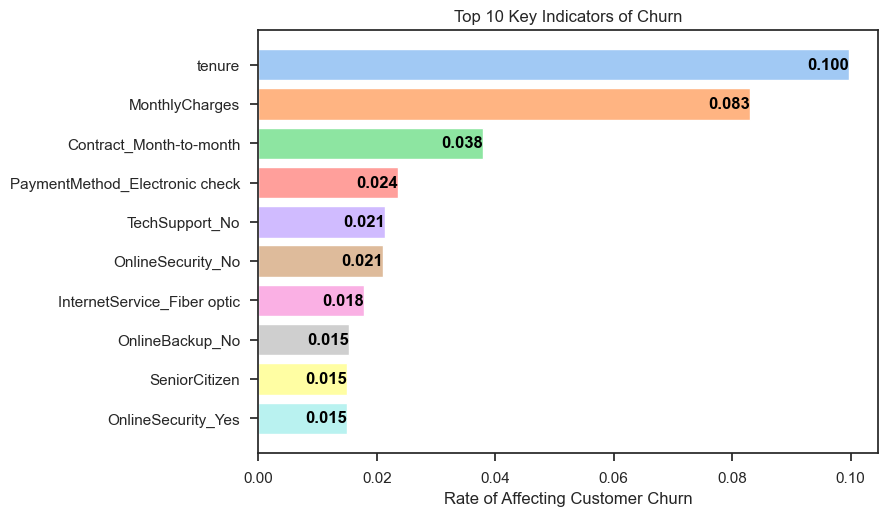

In [32]:
# Define a color palette
palette = sns.color_palette('pastel')

# Create a bar chart of the top 10 features and their importances
fig, ax = plt.subplots()
ax.barh(feature_importances.index[:10], feature_importances['importance'][:10], color=palette)
ax.invert_yaxis()
ax.set_xlabel('Rate of Affecting Customer Churn')
ax.set_title('Top 10 Key Indicators of Churn')

# Add labels to the bars
for i, v in enumerate(feature_importances['importance'][:10]):
    ax.text(v, i, f'{v:.3f}', color='black', fontweight='bold', ha='right', va='center')


# Show the chart
plt.show()

### Q9. What strategies can be implemented to retain customers and reduce churn?

In [33]:
X_num = X.assign(Churn_numeric=churn_df['Churn_numeric'])
X_num['Contract_Month-to-month']

customerID
7590-VHVEG    1.0
5575-GNVDE    0.0
3668-QPYBK    1.0
7795-CFOCW    0.0
9237-HQITU    1.0
             ... 
6840-RESVB    0.0
2234-XADUH    0.0
4801-JZAZL    1.0
8361-LTMKD    1.0
3186-AJIEK    0.0
Name: Contract_Month-to-month, Length: 7043, dtype: float64

In [34]:
# # calculate correlations between churn and other variables
# corr_matrix = churn_df.corr()
# churn_corr = corr_matrix['Churn_numeric'].sort_values(ascending=False)

# # print variables that are most strongly correlated with churn
# print(churn_corr.head(10))

# # suggest retention strategies based on key indicators of churn
# if churn_corr['Contract_Month-to-month'] > 0.2:
#     print('Offer longer-term contracts to customers on a month-to-month basis')
# if churn_corr['OnlineSecurity_No'] > 0.1:
#     print('Promote the benefits of online security features to customers')
# if churn_corr['TechSupport_No'] > 0.1:
#     print('Improve technical support offerings for customers')
# if churn_corr['MonthlyCharges'] > 0.05:
#     print('Consider reducing monthly charges for high-value customers')
# if churn_corr['TotalCharges'] < -0.1:
#     print('Improve billing and payment processes to avoid errors and disputes')


### Data Cleaning

In [35]:
churn_df = churn_df.replace(' ', np.NaN) # Replace blank spaces with NaN values
churn_df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_numeric        0
dtype: int64

In [36]:
churn_df = churn_df.dropna() # Drop rows with NaN values in TotalCharges
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges']) # Convert TotalCharges to numeric data type
#churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float)

In [37]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0


In [38]:
# Checking Data Types
churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
Churn_numeric         int64
dtype: object

In [39]:
churn_df_new = churn_df.drop(columns= 'Churn_numeric')

In [40]:
churn_df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [41]:
churn_df_new.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [42]:
cat_cols = ['Churn']

for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(churn_df[col])
    churn_df[col] = encoder.transform(churn_df[col])

In [43]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [44]:
churn_df.drop(columns=['Churn_numeric'], inplace= True)

In [45]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [46]:
# cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
#                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# for col in cat_cols:
#     encoder = LabelEncoder()
#     encoder.fit(churn_df[col])
#     churn_df[col] = encoder.transform(churn_df[col])

# One-hot encode categorical variables
ohe = OneHotEncoder()
ohe.fit(churn_df.select_dtypes(include=['object']))
categorical_columns = churn_df.select_dtypes(include=['object']).columns
X_ohe = pd.DataFrame(ohe.transform(churn_df.select_dtypes(include=['object'])).toarray(),
                     columns=ohe.get_feature_names_out(categorical_columns))
X_ohe.index = churn_df.index

# Combine one-hot encoded features with numerical features
churn_df_1hot = pd.concat([churn_df.select_dtypes(include=['int64', 'int32']), X_ohe], axis=1)

In [47]:
churn_df_1hot

,SeniorCitizen,tenure,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5575-GNVDE,0,34,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3668-QPYBK,0,2,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7795-CFOCW,0,45,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9237-HQITU,0,2,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2234-XADUH,0,72,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4801-JZAZL,0,11,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [48]:
churn_df_1hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   Churn                                    7032 non-null   int32  
 3   gender_Female                            7032 non-null   float64
 4   gender_Male                              7032 non-null   float64
 5   Partner_No                               7032 non-null   float64
 6   Partner_Yes                              7032 non-null   float64
 7   Dependents_No                            7032 non-null   float64
 8   Dependents_Yes                           7032 non-null   float64
 9   PhoneService_No                          7032 non-null   float64
 10  PhoneService_Yes                      

In [49]:
churn_df_1hot.isna().sum()

SeniorCitizen                              0
tenure                                     0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBack

In [50]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


### Model Building and Selection

In [51]:
X = churn_df_1hot.drop(['Churn'], axis=1)
y = churn_df_1hot['Churn']

In [52]:
# # Convert target variable to numeric values
# le = LabelEncoder()
# y = le.fit_transform(y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Bagging (Bootstrap Aggregating)

Confusion Matrix:
 [[1362  193]
 [ 304  251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1555
           1       0.57      0.45      0.50       555

    accuracy                           0.76      2110
   macro avg       0.69      0.66      0.67      2110
weighted avg       0.75      0.76      0.76      2110

Accuracy: 0.7644549763033175
AUC-ROC: 0.7786164943078127


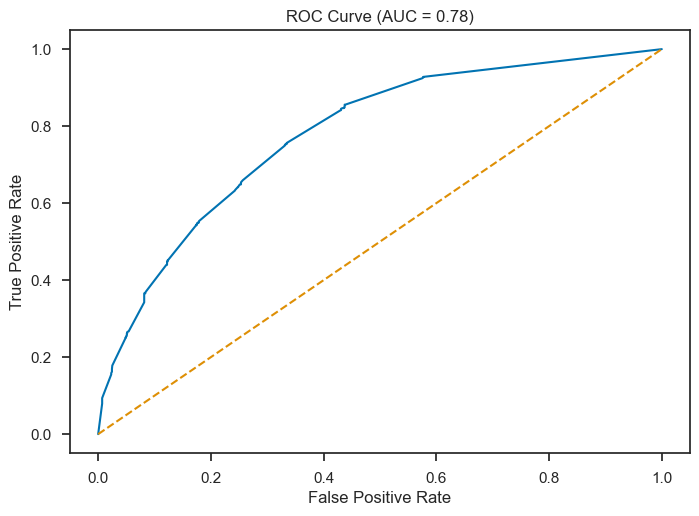

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the base classifier
base_classifier = DecisionTreeClassifier()

# Define the bagging classifier with 10 base classifiers
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=1)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_classifier.predict(X_test)
y_proba = bagging_classifier.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
accu = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Evaluate the performance of the bagging classifier
print('Confusion Matrix:\n', cm )
print('Classification Report:\n', cr)
print('Accuracy:', accu)
print('AUC-ROC:', auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()


### Ada Boost Classifier

Confusion Matrix:
 [[1390  165]
 [ 256  299]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.54      0.59       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy: 0.8004739336492891

AUC Score: 0.8491179282176067


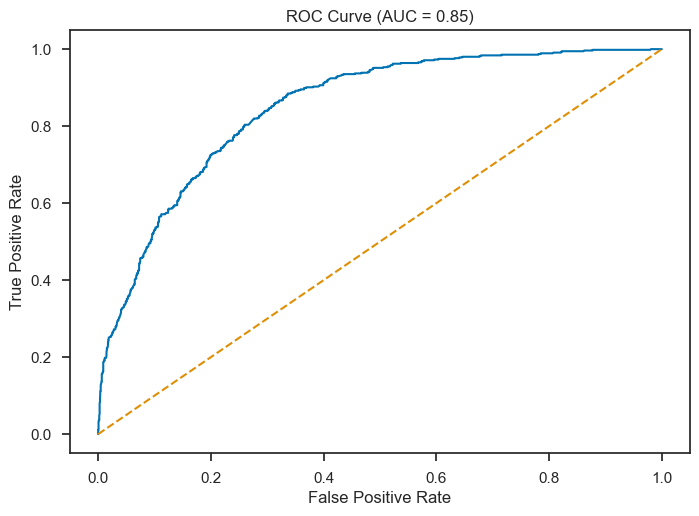

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Create an AdaBoostClassifier object with 50 decision trees as weak learners
ada = AdaBoostClassifier(n_estimators=50, random_state=1)

# Train the model on the training data
ada.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada.predict(X_test)

# Generate the confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accu = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)
print("\nClassification Report:\n", class_report)
print('Accuracy:', accu)


# Get predicted probabilities for positive class (class "Yes")
y_proba = ada.predict_proba(X_test)[:,1]

# Calculate the AUC score
auc = roc_auc_score(y_test, y_proba)
print("\nAUC Score:", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

### Logistic Regression

Confusion Matrix:
 [[1376  179]
 [ 250  305]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1555
           1       0.63      0.55      0.59       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy: 0.7966824644549763

AUC Score: 0.8423834767243127


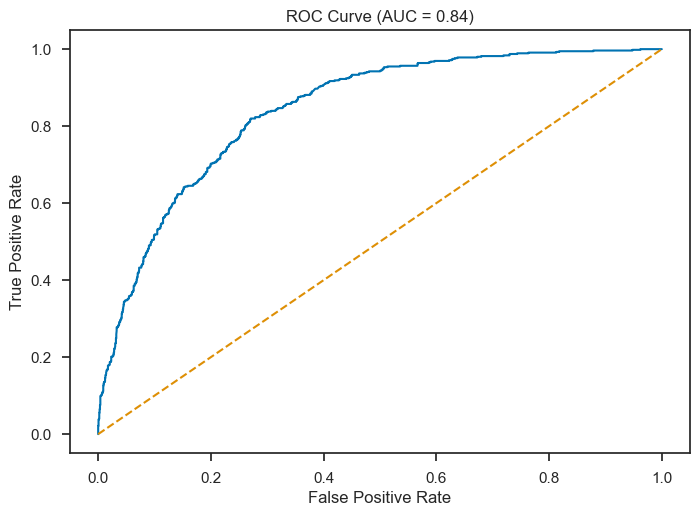

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

accu = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print('Confusion Matrix:\n', cm)
print('Classification Report:\n', cr)
print('Accuracy:', accuracy_score(y_test, y_pred))


# Calculate the AUC score
auc = roc_auc_score(y_test, y_proba)
print("\nAUC Score:", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()


### Decision Tree

Confusion Matrix:
[[1248  307]
 [ 286  269]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1555
           1       0.47      0.48      0.48       555

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110

Accuracy: 0.718957345971564

AUC Score: 0.6552799745082704


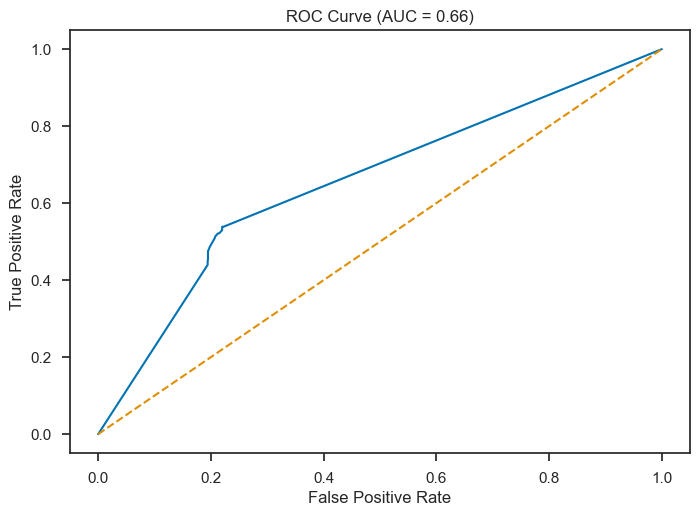

In [57]:
dt_reg = DecisionTreeClassifier()
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)
y_proba = dt_reg.predict_proba(X_test)[:, 1]


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# add AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print("\nAUC Score:", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

### Random Forest

Confusion Matrix:
[[1375  180]
 [ 295  260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1555
           1       0.59      0.47      0.52       555

    accuracy                           0.77      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.77      0.77      2110

Accuracy: 0.7748815165876777

AUC Score: 0.8030097621737492


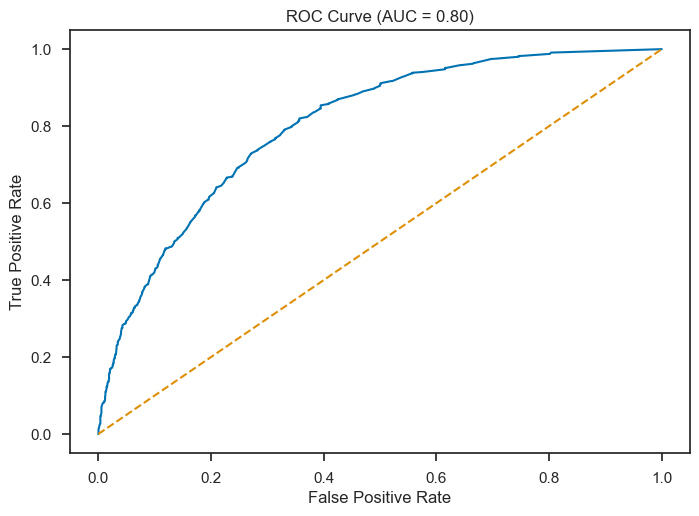

In [58]:
rf_reg = RandomForestClassifier(n_estimators=100, random_state=1)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)
y_pred_prob = rf_reg.predict_proba(X_test)[:, 1]


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# add AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC Score:", auc)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

### Balanced Random Forest Classifier

Confusion Matrix:
 [[1105  450]
 [ 123  432]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1555
           1       0.49      0.78      0.60       555

    accuracy                           0.73      2110
   macro avg       0.69      0.74      0.70      2110
weighted avg       0.79      0.73      0.74      2110

Accuracy: 0.728436018957346
AUC: 0.817343066539208


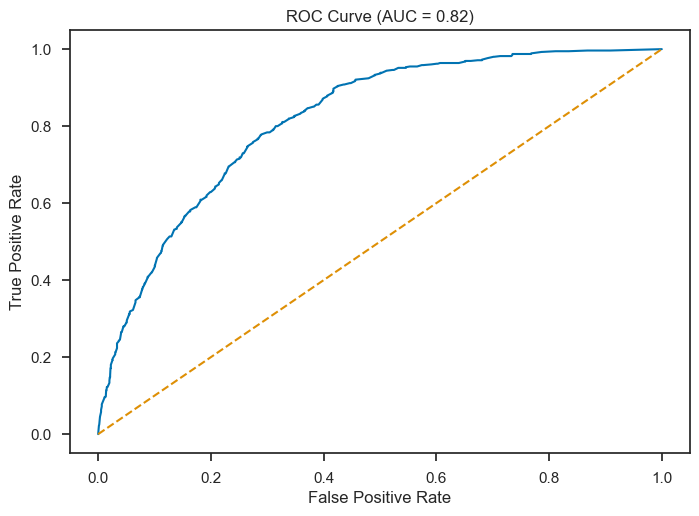

In [59]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fit a BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = brf.predict(X_test)
y_pred_prob = brf.predict_proba(X_test)[:,1]

# Print the confusion matrix and classification report
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


# Calculate the AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()


### Gradient Boosting

Confusion Matrix:
[[1389  166]
 [ 263  292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.53      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy: 0.7966824644549763
AUC: 0.8454795631644505


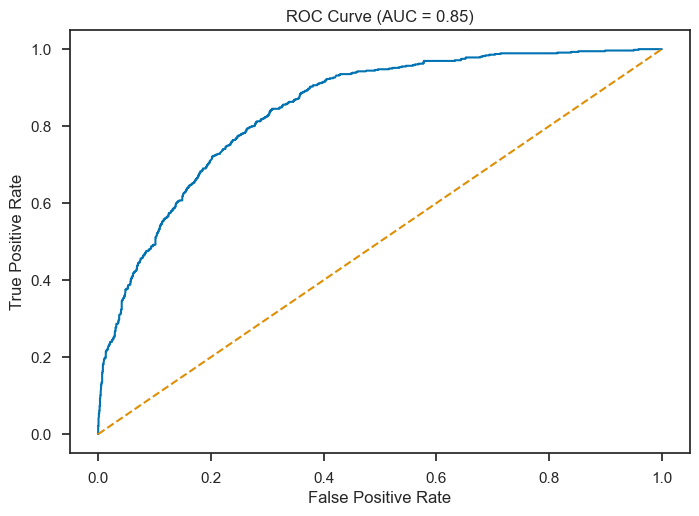

In [60]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=1)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)[:, 1]


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


# add AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()


Based on the evaluation metrics, the Gradient Boosting model seems to be the best-performing model out of the four models.

It has the highest accuracy of 0.802 and AUC-ROC score of 0.85, indicating good overall performance in both metrics. In addition, its precision, recall, and f1-score for the positive class (Yes) are all higher than those of the other models, hrnce, will select the Gradient Boosting model for the classification task.

### Cat Boost Classifier

Confusion Matrix:
 [[1368  187]
 [ 266  289]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1555
           1       0.61      0.52      0.56       555

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Accuracy: 0.7853080568720379
AUC: 0.8329816633353611


Text(0.5, 1.0, 'ROC Curve (AUC = 0.83)')

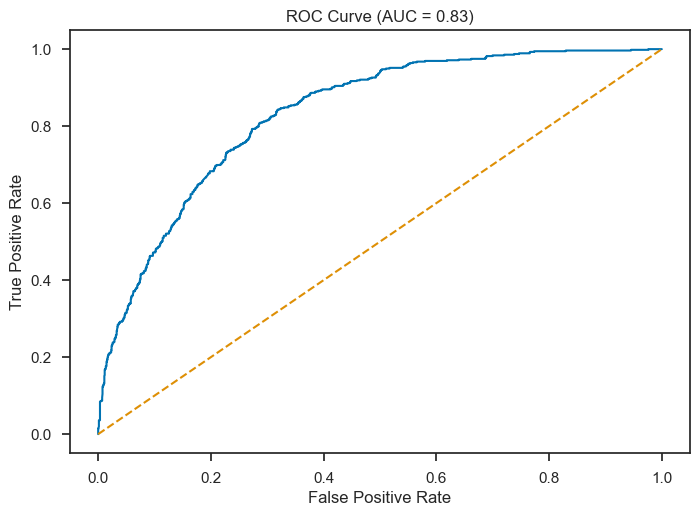

In [61]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize CatBoostClassifier
cat = CatBoostClassifier(random_state=1, verbose=0)

# Fit the model
cat.fit(X_train, y_train)

# Make predictions on test data
y_pred = cat.predict(X_test)
y_pred_prob = cat.predict_proba(X_test)[:, 1]

# Compute confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)
accu = accuracy_score(y_test, y_pred)
print('Accuracy:', accu)


# # Compute AUC
# auc = roc_auc_score(y_test, y_pred_prob)
# print("AUC:", auc)


# add AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))


In [62]:
# # Create a Gradient Boosting classifier object
# #gb = GradientBoostingClassifier()
# ada = AdaBoostClassifier()


# # Define the hyperparameters and their values to be tried
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Use GridSearchCV to search for the best hyperparameter combination
# grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameter combination and the corresponding accuracy score
# print('Best hyperparameters:', grid_search.best_params_)
# print('Accuracy:', grid_search.best_score_)


# Create an AdaBoostClassifier object
ada = AdaBoostClassifier()

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1.0]
}

# Use GridSearchCV to search for the best hyperparameter combination
grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter combination and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 1.0, 'n_estimators': 50}
Best accuracy score:  0.8086172671371384


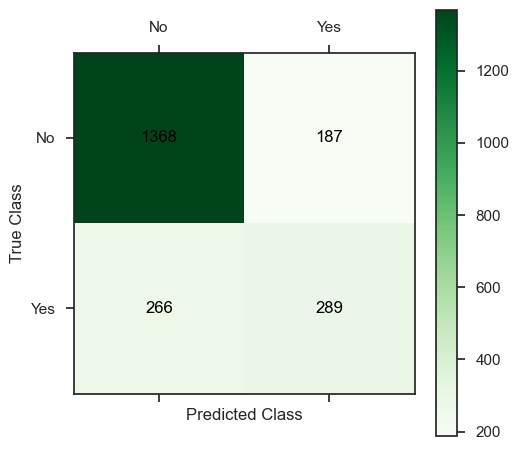

In [63]:
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
plt.matshow(cm, cmap=plt.cm.Greens)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()